<a href="https://colab.research.google.com/github/Anggunasr/MSBA2425/blob/main/Synthetic_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Synthetic Data Generation

Synthetic data generation is the process of creating artificial data that mimics the characteristics of real-world data.Synthetic data generation is used when real data is scarce, sensitive, or difficult to obtain. It can also be used to protect privacy by creating datasets that resemble real data without containing any personally identifiable information. There are two broad classes of methods for generating synthetic data.

1. **Statistical Modeling Based Methods:**
This approach involves fitting statistical distributions to the observed data and then sampling from these fitted distributions to create new synthetic data points. In *independent feature modeling*, fit a suitable distribution fo each feature and draw samples from these fitted distributions. *Copula based methods* can capture complex dependencies between variables, even non-linear ones.

2. **Machine Learning Based Methods:**
These methods leverage machine learning models to learn the underlying patterns in the data and generate new samples that resemble the original data. *Generative Adversarial Networks (GANs)* and *Variational Autoencoders (VAEs)* are useful in this context.GANs consist of two neural networks: a Generator that tries to create synthetic data and a Discriminator that tries to distinguish between real and synthetic data. They are trained in an adversarial manner.VAEs are generative models that learn a latent representation of the data. They consist of an Encoder that maps the input data to a lower-dimensional latent space (typically a Gaussian distribution) and a Decoder that reconstructs the original data from the latent space. New data points are generated by sampling from the latent space and passing them through the Decoder.





#Tabular GANs
Tabular GANs are a type of Generative Adversarial Network (GAN) specifically designed to generate synthetic tabular data (data organized in rows and columns, like a spreadsheet or a Pandas DataFrame) that closely resembles a real-world dataset. Traditional GANs were initially more successful in generating continuous data like images. Tabular data presents unique challenges due to the presence of:
* Mixed Data Types: Tables often contain both numerical (continuous or discrete) and categorical features.
* Complex Correlations: Features in a table can have intricate linear and non-linear relationships.
* Unbalanced Categories: Categorical features can have classes with highly varying frequencies.
* Discrete Values: Even numerical columns might represent discrete quantities.


CTGAN (Conditional Tabular Generative Adversarial Network) addresses these challenges through several key innovations built upon the standard GAN architecture:
* Generator (G):
Takes random noise as input.
Its goal is to generate synthetic data samples that the discriminator cannot distinguish from real data.
It uses neural networks (typically Multi-Layer Perceptrons or MLPs) to transform the noise into synthetic tabular data.
* Discriminator (D):
Takes a batch of data as input, which can be a mix of real data samples from the original dataset and synthetic data samples generated by the generator.
Its goal is to correctly classify each input sample as either "real" or "synthetic."
It also uses neural networks (MLPs) for this classification task.
* Adversarial Training:
The generator and discriminator are trained in an adversarial manner.
The generator tries to fool the discriminator by producing increasingly realistic synthetic data.
The discriminator tries to become better at distinguishing real from synthetic data.
This competition drives both networks to improve, ideally leading the generator to produce synthetic data that is statistically very similar to the real data.


In essence, CTGAN aims to learn the underlying data generation process of  tabular dataset by training a generator to produce synthetic data that fools a discriminator trained to distinguish it from the real data.

In [1]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8

In [2]:
import sdv
!pip show sdv

Name: sdv
Version: 1.20.1
Summary: Generate synthetic data for single table, multi table and sequential data
Home-page: 
Author: 
Author-email: "DataCebo, Inc." <info@sdv.dev>
License: BSL-1.1
Location: /usr/local/lib/python3.11/dist-packages
Requires: boto3, botocore, cloudpickle, copulas, ctgan, deepecho, graphviz, numpy, pandas, platformdirs, pyyaml, rdt, sdmetrics, tqdm
Required-by: 


#Read Data

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9LQ0-GenAI/main/Data/Wine.csv')

In [7]:
data

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,C,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,C,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,C,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#Create and Validate Meta Data

In [8]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=data)

In [9]:
metadata.validate_table(data=data)

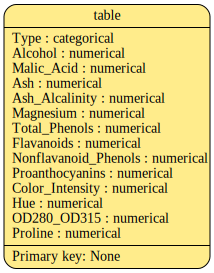

In [10]:
metadata.visualize(
    show_table_details='full',
    show_relationship_labels=True,
    output_filepath='my_metadata.png'
)

#Correct Column Attributes

See https://docs.sdv.dev/sdv/reference/metadata-spec/sdtypes

In [ ]:
metadata.update_column(
    column_name='Name',
    sdtype='last_name',
    pii=True)

metadata.update_column(
    column_name='Ticket',
    sdtype='id')

metadata.validate()

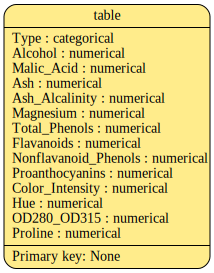

In [11]:
metadata.visualize(
    show_table_details='full',
    show_relationship_labels=True,
    output_filepath='my_metadata.png'
)

##Save the Meta Data

In [12]:
metadata.save_to_json(filepath='my_metadata.json')

#Create Synthetic Data

##GaussianCopulaSynthesizer
This is a statistical learning based method.

In [13]:
from sdv.single_table import GaussianCopulaSynthesizer

# Step 1: Create the synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)

# Step 2: Train the synthesizer
synthesizer.fit(data)

# Step 3: Generate synthetic data
synthetic_data_GCS = synthesizer.sample(num_rows=10)

In [14]:
synthetic_data_GCS

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,C,12.49,1.81,2.35,17.9,94,1.42,0.62,0.34,1.42,2.544647,0.872,1.69,394
1,B,13.08,1.10,2.16,16.5,103,2.24,1.71,0.29,1.96,4.967786,1.086,3.84,859
2,C,13.58,1.36,2.79,23.8,104,2.23,2.30,0.30,1.59,7.292207,0.801,2.22,1203
3,B,11.48,1.08,2.18,19.7,96,2.22,2.24,0.32,1.71,2.752350,1.198,3.13,432
4,A,13.76,3.78,2.73,19.9,122,3.03,2.83,0.44,1.52,3.858698,1.441,3.62,946
5,A,13.99,1.27,2.76,19.6,88,3.38,4.20,0.35,1.88,4.359468,0.814,3.94,1030
6,B,12.65,1.05,2.48,15.5,102,3.02,3.47,0.18,2.32,3.655183,1.083,3.53,984
7,A,12.56,2.97,2.81,19.3,83,2.75,3.19,0.44,2.19,5.249331,1.266,3.85,1008
8,B,11.82,5.34,2.27,17.6,97,1.82,0.49,0.57,1.23,4.670662,0.991,1.87,390
9,A,14.04,1.07,2.62,16.9,113,1.60,0.67,0.57,1.45,5.602273,1.103,1.47,1091


#CTGANSynthesizer
The CTGAN Synthesizer uses GAN-based, deep learning methods to train a model and generate synthetic data.

In [15]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data)

synthetic_data_CTGAN = synthesizer.sample(num_rows=10)

In [16]:
synthetic_data_CTGAN

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,C,13.74,1.77,2.75,17.1,96,3.43,0.44,0.41,1.23,2.423808,0.927,2.70,659
1,A,12.43,1.08,2.05,22.1,82,3.30,1.69,0.37,3.56,4.443082,0.712,3.22,278
2,B,12.48,4.56,2.48,19.4,108,2.13,2.00,0.35,2.41,9.382867,0.764,3.99,278
3,A,13.68,1.55,2.34,16.4,87,3.78,4.31,0.23,1.94,4.306388,0.593,2.68,278
4,C,14.83,0.75,2.66,12.0,93,3.33,2.18,0.66,1.45,2.149890,0.994,4.00,278
5,A,12.86,2.60,2.30,14.8,98,1.52,0.60,0.44,0.41,2.294932,1.214,2.10,455
6,B,13.73,0.91,2.91,13.4,77,3.88,0.80,0.52,1.31,3.708824,1.550,2.60,379
7,C,13.30,2.37,2.57,16.2,79,2.66,1.39,0.60,0.91,2.498740,1.071,2.94,689
8,C,12.58,1.85,2.63,19.3,71,3.88,0.34,0.57,2.17,1.280000,1.471,2.78,926
9,B,11.03,1.19,2.45,18.3,90,3.77,1.82,0.38,2.89,2.861186,0.784,2.41,378


## Analyze the synthesizer

In [ ]:
synthesizer.get_parameters()

In [ ]:
synthesizer.get_loss_values()

In [ ]:
fig = synthesizer.get_loss_values_plot()
fig.show()

##TVAESynthesizer
The TVAE Synthesizer uses a variational autoencoder (VAE)-based, neural network techniques to train a model and generate synthetic data.

In [17]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(data)

synthetic_data_TVAE = synthesizer.sample(num_rows=10)

In [18]:
synthetic_data_TVAE

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,B,11.48,1.51,2.67,26.4,100,2.17,2.70,0.61,0.89,2.762648,1.426,3.93,377
1,A,12.83,2.33,2.32,17.9,91,2.62,3.90,0.26,1.67,5.842145,1.196,3.72,866
2,A,13.40,1.39,2.79,18.6,114,2.70,3.09,0.30,1.18,5.173350,1.279,2.58,1152
3,C,13.45,3.04,2.53,18.1,121,2.25,1.26,0.35,0.97,5.062770,0.944,3.23,618
4,A,13.14,4.47,2.23,19.1,115,2.95,2.94,0.40,2.13,4.374577,1.003,2.86,1307
5,C,13.82,3.39,2.37,22.7,97,1.54,0.36,0.39,1.11,11.551619,0.744,1.79,951
6,C,13.84,2.62,2.51,19.9,100,1.90,0.95,0.35,1.30,8.823879,0.589,1.82,628
7,B,12.78,1.43,2.39,16.9,105,1.55,0.83,0.26,1.08,4.620781,1.074,2.25,432
8,A,13.20,1.56,2.25,14.6,105,3.49,3.16,0.23,1.43,6.152417,0.949,3.68,1053
9,B,12.59,1.45,2.13,19.6,91,3.25,2.15,0.31,1.21,3.074182,1.208,2.15,825


In [19]:
synthesizer.get_parameters()

{'enforce_min_max_values': True,
 'enforce_rounding': True,
 'embedding_dim': 128,
 'compress_dims': (128, 128),
 'decompress_dims': (128, 128),
 'l2scale': 1e-05,
 'batch_size': 500,
 'verbose': False,
 'epochs': 300,
 'loss_factor': 2,
 'cuda': True}

In [20]:
synthesizer.get_loss_values()

,Epoch,Batch,Loss
0,0,0,58.462688
1,1,0,52.123363
2,2,0,48.268475
3,3,0,47.900448
4,4,0,44.058590
...,...,...,...
295,295,0,-10.212282
296,296,0,-10.990110
297,297,0,-11.235830
298,298,0,-9.973171


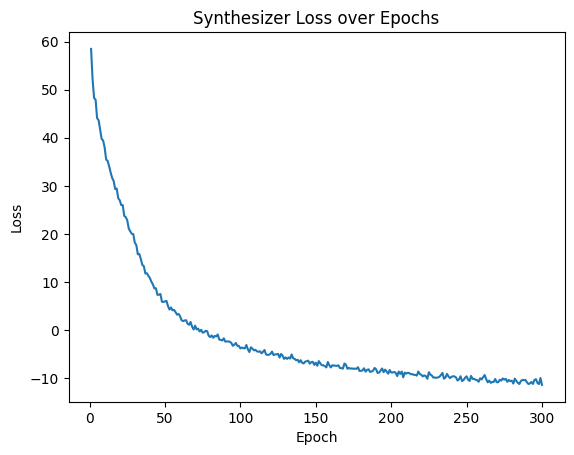

In [21]:
import matplotlib.pyplot as plt

# Get the loss values from the synthesizer
loss_values_df = synthesizer.get_loss_values()

# loss values in your DataFrame
loss_values = loss_values_df['Loss'].tolist()

# Extract the epochs and loss values
epochs = list(range(1, len(loss_values) + 1))

# Create the plot
plt.plot(epochs, loss_values)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Synthesizer Loss over Epochs")
plt.show()

#Evaluation
As a final step to your synthetic data project, you can evaluate and visualize the synthetic data against the real data.

In [22]:
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality
from sdv.evaluation.single_table import get_column_plot

# perform basic validity checks
diagnostic = run_diagnostic(data, synthetic_data_TVAE, metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1815.88it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 294.98it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [23]:
# measure the statistical similarity
quality_report = evaluate_quality(data, synthetic_data_TVAE, metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 630.28it/s]|
Column Shapes Score: 75.75%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:01<00:00, 83.39it/s]|
Column Pair Trends Score: 79.55%

Overall Score (Average): 77.65%



In [25]:
# plot the data
fig = get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata,
    column_name='Type'
)

fig.show()

#Your Turn
Create synthetic data from `Wine.csv`. Build a predictive model to predict the outcome `Type`. Assess whether the prediction from the original data is similar to the prediction from the synthetic data.